In [1]:
%autosave 20

Autosaving every 20 seconds


In [2]:
# Import Python Packages
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# pip install plotly
import plotly.express as px


In [4]:
# imports

data_it = pd.read_csv('data_it.csv')


# Criacao de modelo

# Brasil

In [5]:
pais = data_it

In [6]:
#esperado 3749 7 for data transformed

pais.shape

(53, 7)

In [7]:
pais.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered,dayCount
48,03/19/2020,NaN,Italy,41035.0,3405.0,4440.0,48
49,03/20/2020,NaN,Italy,47021.0,4032.0,4440.0,49
50,03/21/2020,NaN,Italy,53578.0,4825.0,6072.0,50
51,03/22/2020,NaN,Italy,59138.0,5476.0,7024.0,51
52,03/23/2020,NaN,Italy,63927.0,6077.0,7432.0,52


In [8]:
data_model = pais.groupby(['Country','dayCount']).agg({'Confirmed':  ['sum'],'Recovered':  ['sum'], 'Deaths': ['sum'] })
data_model.columns = ['Confirmed', 'Recovered', 'Deaths']
data_model = data_model.reset_index()
data_model.shape

(53, 5)

In [9]:
data_model.head()


,Country,dayCount,Confirmed,Recovered,Deaths
0,Italy,0,2.0,0.0,0.0
1,Italy,1,2.0,0.0,0.0
2,Italy,2,2.0,0.0,0.0
3,Italy,3,2.0,0.0,0.0
4,Italy,4,2.0,0.0,0.0


## ----------------------------------------------------------------

## TRAIN  TEST

# RANDON FOREST REGRESSOR

In [10]:
X = data_model.iloc[:, 1:2].values
y = data_model.iloc[:, 4].values

y = y.reshape(-1, 1)


In [11]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


previsor = RandomForestRegressor()


random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


rf_search = RandomizedSearchCV(previsor,
                                random_grid,
                                scoring='neg_mean_squared_error',
                                cv = 3,
                                return_train_score=True,
                                n_jobs = -1,
                                n_iter = 40, 
                                verbose=1  )


In [12]:
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [13]:
rf_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [14]:
rf_confirmed = rf_search.best_estimator_

In [15]:
rf_confirmed

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [17]:
rf_pred_future = rf_confirmed.predict(future)

In [18]:
rf_test_pred = rf_confirmed.predict(X_test)

In [19]:
rf_test_pred

array([1449.1       ,  147.44444444,  523.52222222,  166.12222222,
          0.        ,    0.        ,   74.42777778,  955.65555556,
         23.54444444,    9.14444444,    0.        ,    0.        ,
         16.        , 5089.26666667,   59.27222222,  265.71666667])

In [20]:
rf_pred_future

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.11111111e-02,
       1.11111111e-01, 8.05555556e-01, 1.86111111e+00, 3.07777778e+00,
       6.26111111e+00, 8.53888889e+00, 9.14444444e+00, 1.60000000e+01,
       1.68166667e+01, 2.35444444e+01, 5.92722222e+01, 7.44277778e+01,
       1.47444444e+02, 1.66122222e+02, 1.90044444e+02, 2.15755556e+02,
       2.44250000e+02, 2.65716667e+02, 5.23522222e+02, 6.66350000e+02,
       8.09261111e+02, 9.55655556e+02, 1.18361111e+03, 1.44910000e+03,
       1.87045556e+03, 2.12391667e+03, 2.44802778e+03, 2.89434444e+03,
       3.37848889e+03, 3.87961667e+03, 4.54085556e+03, 5.08926667e+03,
       5.08926667e+03, 5.08926667e+03, 5.08926667e+03, 5.08926667e+03,
      

In [21]:
scoreTreino = rf_confirmed.score(X_train, y_train)
scoreTeste = rf_confirmed.score(X_test, y_test)


In [22]:
scoreTreino

0.9965788990774586

In [23]:
scoreTeste

0.9704988357507641

MAE: 91.8670138888889
MSE: 63457.2108082562


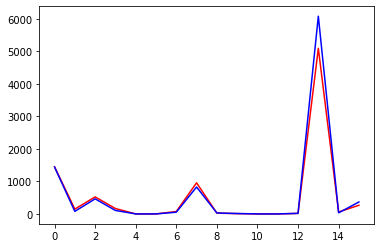

In [24]:
#testando
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(rf_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(rf_test_pred, y_test))
print('MSE:', mean_squared_error(rf_test_pred, y_test))



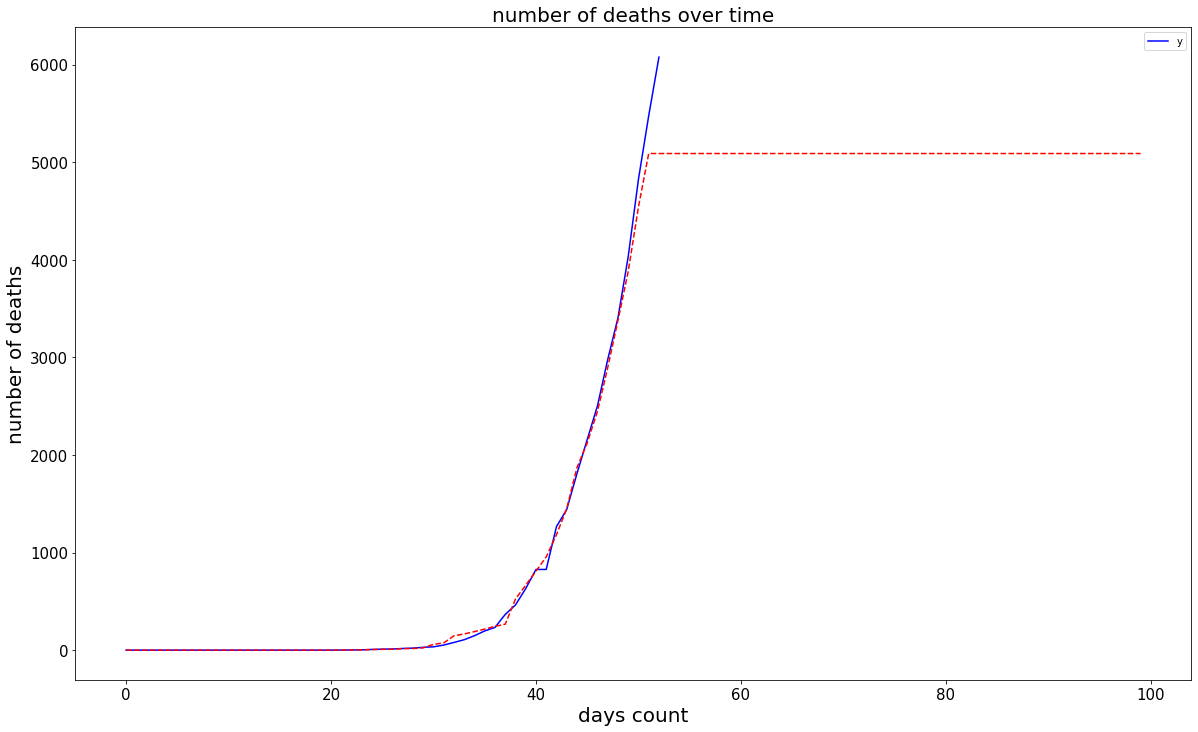

In [25]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, rf_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.legend('predict')
plt.ylabel('number of deaths', size = 20)
plt.legend('y')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# --------------------------------------------------------------------------------

# SVM REGRESSOR

In [26]:
data_model.head()

,Country,dayCount,Confirmed,Recovered,Deaths
0,Italy,0,2.0,0.0,0.0
1,Italy,1,2.0,0.0,0.0
2,Italy,2,2.0,0.0,0.0
3,Italy,3,2.0,0.0,0.0
4,Italy,4,2.0,0.0,0.0


In [27]:
X = data_model.iloc[:, 1].values
y = data_model.iloc[:, 4].values

In [28]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [29]:
y

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
       7.000e+00, 1.000e+01, 1.200e+01, 1.700e+01, 2.100e+01, 2.900e+01,
       3.400e+01, 5.200e+01, 7.900e+01, 1.070e+02, 1.480e+02, 1.970e+02,
       2.330e+02, 3.660e+02, 4.630e+02, 6.310e+02, 8.270e+02, 8.270e+02,
       1.266e+03, 1.441e+03, 1.809e+03, 2.158e+03, 2.503e+03, 2.978e+03,
       3.405e+03, 4.032e+03, 4.825e+03, 5.476e+03, 6.077e+03])

In [30]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [32]:
#svm model
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'kernel' : kernel , 'C' : c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

previsor = SVR()

svm_search = RandomizedSearchCV(previsor, 
                                svm_grid,
                                scoring='neg_mean_squared_error',
                                cv=3, 
                                return_train_score=True,
                                n_jobs = -1, 
                                n_iter=40, 
                                verbose=1 )



In [33]:
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [34]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 0.1}

In [35]:
svm_confirmed = svm_search.best_estimator_

In [36]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [37]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [38]:
svm_pred_future = svm_confirmed.predict(future)

In [39]:
svm_test_pred = svm_confirmed.predict(X_test)

In [40]:
svm_test_pred

array([ -60.89090792, 1540.99720777,  -80.06611675, 2305.24156619,
        283.74460193,  424.1900503 ,  -51.8887328 , 2452.0979451 ,
       2028.68860448,  -89.91284559, 1134.38296963,  139.47946728,
        660.35798753,   17.88292286,  -92.83039488,  205.85371367])

In [41]:
svm_pred_future

array([-9.40588367e+01, -9.40396423e+01, -9.39052815e+01, -9.35405878e+01,
       -9.28303949e+01, -9.16595363e+01, -8.99128456e+01, -8.74751564e+01,
       -8.42313022e+01, -8.00661167e+01, -7.48644335e+01, -6.85110860e+01,
       -6.08909079e+01, -5.18887328e+01, -4.13893942e+01, -2.92777258e+01,
       -1.54385611e+01,  2.43266338e-01,  1.78829229e+01,  3.75955750e+01,
        5.94963891e+01,  8.37005316e+01,  1.10323169e+02,  1.39479467e+02,
        1.71284593e+02,  2.05853714e+02,  2.43301994e+02,  2.83744602e+02,
        3.27296703e+02,  3.74073463e+02,  4.24190050e+02,  4.77761630e+02,
        5.34903368e+02,  5.95730432e+02,  6.60357988e+02,  7.28901202e+02,
        8.01475240e+02,  8.78195270e+02,  9.59176457e+02,  1.04453397e+03,
        1.13438297e+03,  1.22883863e+03,  1.32801611e+03,  1.43203058e+03,
        1.54099721e+03,  1.65503116e+03,  1.77424760e+03,  1.89876169e+03,
        2.02868860e+03,  2.16414351e+03,  2.30524157e+03,  2.45209795e+03,
        2.60482781e+03,  

In [42]:
scoreTreino = svm_confirmed.score(X_train, y_train)
scoreTeste = svm_confirmed.score(X_test, y_test)


In [43]:
scoreTreino

0.6846546652890788

In [44]:
scoreTeste

0.6494862262811463

MAE: 586.9034617249802
MSE: 1132902.3975785167


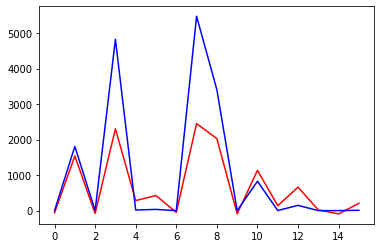

In [45]:
#  Y X PREVISOES
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(svm_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred, y_test))



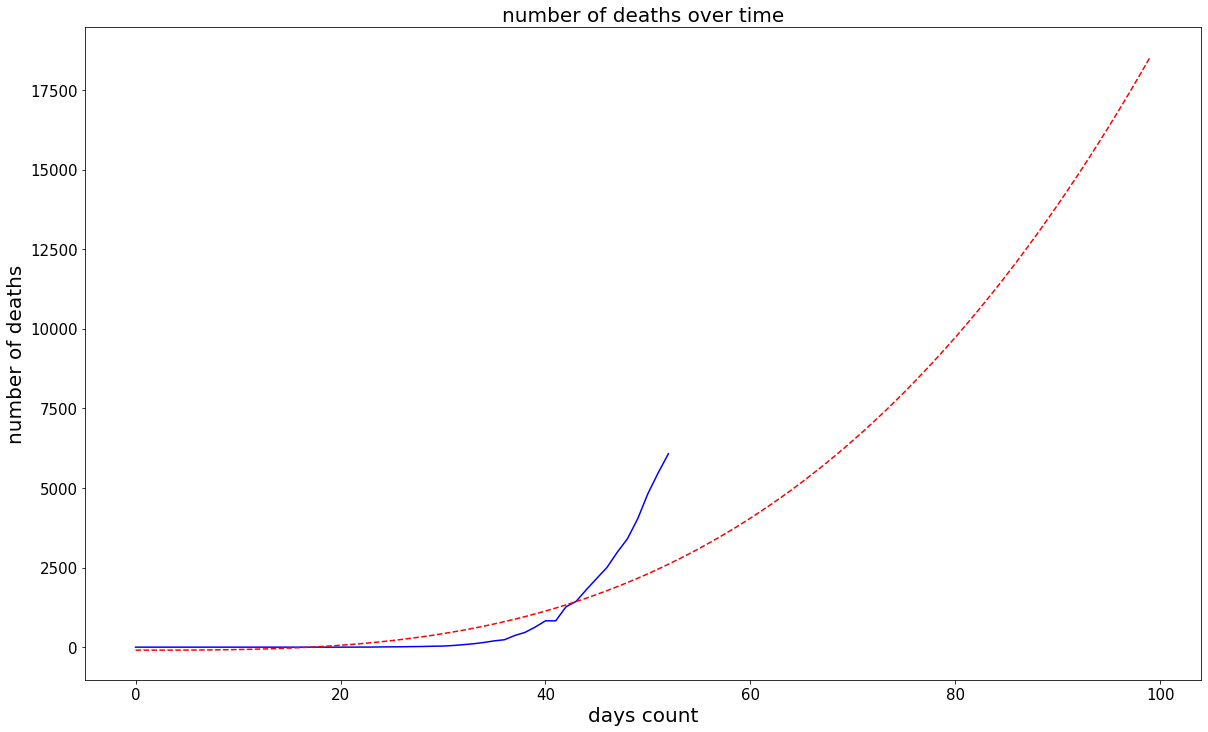

In [53]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, svm_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.ylabel('number of deaths', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()